# Visualization in Python
The options to visualize data in python are as abundant. Most of the functionality we are going to use is found in `matplotlib.pyplot`. 
*Warning: the package `pylab` contains functions from `matplotlib.pyplot` and `numpy`, making it feel much more useful. You can use either package, but be aware, some sources say that using `pylab` is no longer recommended. However, it shouldn't be a problem until it is.*

**The information below draws liberally from** https://matplotlib.org/users/pyplot_tutorial.html
## Functions in Python
### Plot()
Let's see what `plot()` is like in `matplotlib.pyplot`. The syntax is similar to MATLAB's:

```plot(x,y,’<options>’)```

`options` allow you to specify line:
- type (`.`, `-`, `--`, `o`, `s`)
- color (`r`, `g`, `b`, `c`, `m`, `y`, `k`, `w`). 

Plot will connect the plotted points by default.

Plot comes with many different optional arguments: [Plot Arguments](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

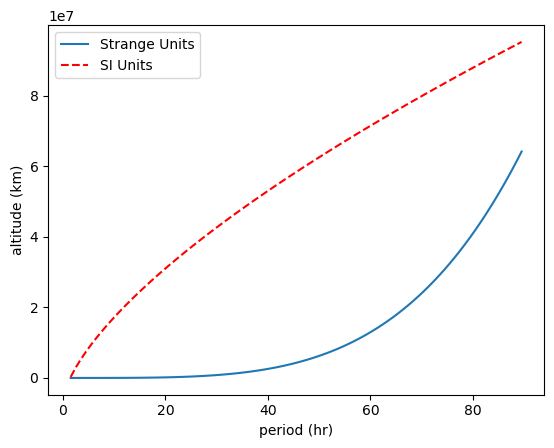

In [15]:
import numpy as np
import matplotlib.pyplot as mp
G = 6.67*10**(-11)
M = 5.98*10**(24)
R = 6.371*10**6
x = np.arange(1.5,90,1)
y = (G*M*(3600*x)**2/(4*np.pi**2))**(1/3)-R
ploth = mp.plot(x,x**4,label='Strange Units')
ploth2 = mp.plot(x,y,'--r',label="SI Units")
mp.xlabel("period (hr)")
mp.ylabel("altitude (km)")
mp.legend()

`plot` returns an object called `lines` that contains properties about the plot you just produced. You can visit [2D lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html) documentation for the details.

In [2]:
ploth

In [3]:
ploth[0].get_xdata()
ploth[0].get_ydata()

array([  283.03274312,  2982.71428589,  5334.84557302,  7469.94586702,
        9451.16419982, 11315.1375642 , 13085.50977154, 14778.65941375,
       16406.52320561, 17978.14001158, 19500.56226002, 20979.42649013,
       22419.32759374, 23824.07382247, 25196.86614143, 26540.42779772,
       27857.10009629, 29148.91461933, 30417.64863956, 31664.86829737,
       32891.96270687, 34100.17122882, 35290.60552112, 36464.267546  ,
       37622.06440961, 38764.82069301, 39893.28877719, 41008.15754919,
       42110.05979081, 43199.57848724, 44277.25224332, 45343.5799582 ,
       46399.02487928, 47444.01813414, 48478.96182055, 49504.23172091,
       50520.17969568, 51527.13580133, 52525.41017072, 53515.29468809,
       54497.0644854 , 55470.97928298, 56437.28459397, 57396.21280924,
       58347.98417693, 59292.80768906, 60230.88188577, 61162.39558642,
       62087.52855558, 63006.45211086, 63919.32967881, 64826.3173041 ,
       65727.56411686, 66623.21276222, 67513.39979586, 68398.25604865,
      

These plot lines allow you to set properties of the lines with finer control.

In [ ]:
ploth[0].get_linewidth()
#ploth[0].get_markersize()

C:\Users\tomke\AppData\Local\Temp\ipykernel_4176\3050291633.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  mp.legend()


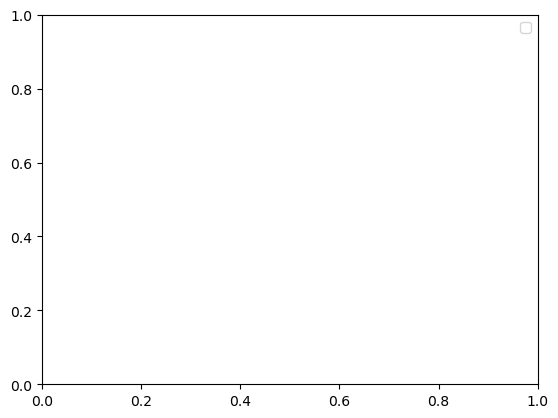

In [13]:
ploth[0].set_linewidth(4)

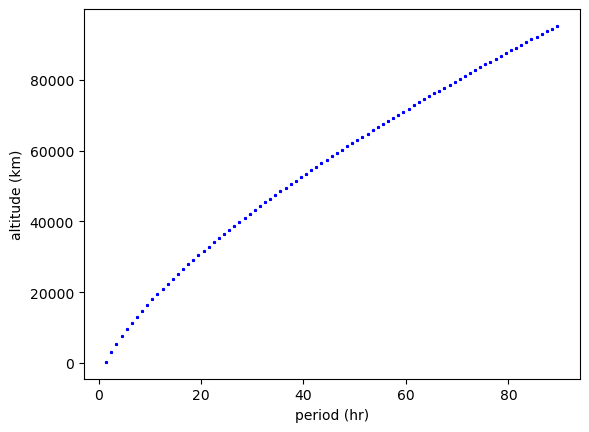

In [25]:
ploth = mp.plot(x,y/1000,'b*', markersize = 2,label='Test')
mp.xlabel("period (hr)")
mp.ylabel("altitude (km)")
ploth[0].set_linewidth(9)

### Scatter()
`scatter()` functions just as `plot()` but it won't connect the dots by default. `scatter` comes with different option arguments: [Scatter Arguments](https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/#)

Text(0, 0.5, 'altitude')

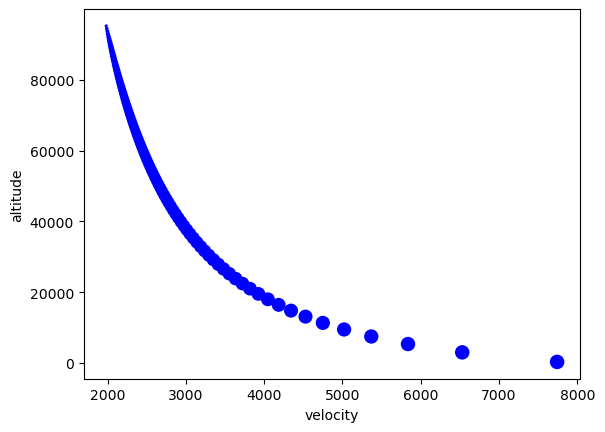

In [30]:
v = np.sqrt(G*M/(R+y))
mp.scatter(v,y/1000,color='blue',s=np.flip(x))
mp.xlabel('velocity')
mp.ylabel('altitude')

In [ ]:
type(x)

You can even include texts and annonations within the graph itself

Text(5, 5000, 'no satellites below this point')

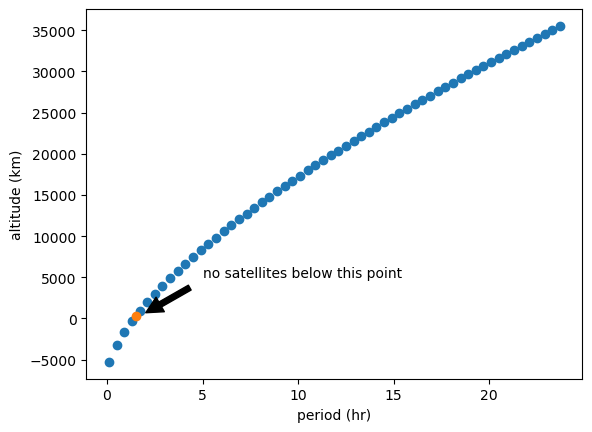

In [31]:
#subplots does create an array of plots, but the default arguments to subplots is col=1, row=1
fig, ax = mp.subplots() 

t = np.arange(0.1, 24,0.4)
y = (G*M*(3600*t)**2/(4*np.pi**2))**(1/3)-R
ax.scatter(t, y/1000)

mp.xlabel('period (hr)')
mp.ylabel('altitude (km)')
t0 = 1.5
y0= (G*M*(3600*t0)**2/(4*np.pi**2))**(1/3)-R
ax.scatter(t0,y0/1000)
ax.annotate('no satellites below this point', xy=(1.5,0), xytext=(5, 5000),\
            arrowprops=dict(facecolor='black',shrink=0.15),)


### Just a note:
You may need to use `show()` to display the plot. 

**Why is that? That seems unnecessary?**
Maybe, but this does allow you to create the entire figure (specifying labels, titles, etc) before it being displayed. You should probably only call `show()` at the end of the program

**But I want to see it now!**
Using `draw()` will draw the graph immediately (that is if you use pyplot instead of pylab)

### Histograms
Producing histograms in python can be confusing. There is a `histogram` function in `numpy`, but it will not graph the histogram for you.

In [32]:
# ensures consistent seeding
rng = np.random.RandomState(10) 
hist, bins = np.histogram(rng.normal(size=1000))
print(hist)
print(bins)

[  4   8  52 122 203 260 191 113  28  19]
[-3.20440134 -2.61597018 -2.02753901 -1.43910785 -0.85067668 -0.26224552
  0.32618565  0.91461681  1.50304798  2.09147914  2.67991031]


You have to load up `matplotlib.pyplot` to graph the histogram (though it does use `np.histogram` to do this).

Text(0.5, 0, 'value')

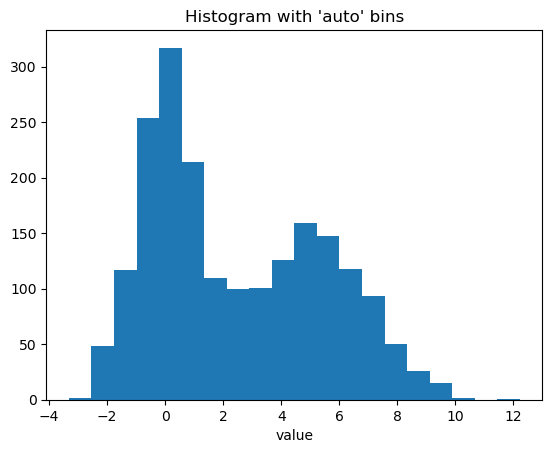

In [33]:
#creates two normal distributions
a = np.hstack((rng.normal(size=1000), rng.normal(5, 2, size=1000))) 
# arguments are passed to mp.hist
h1=mp.hist(a, bins='auto')  
mp.title("Histogram with 'auto' bins")
mp.xlabel('value')
#mp.show()

### Multiple figures and axes
You can define subplot in a very similar manner as in MATLAB by using the `subplot` command in `matplotlib`. Below is an example of how it works. We will graph several different types of plots in one figure

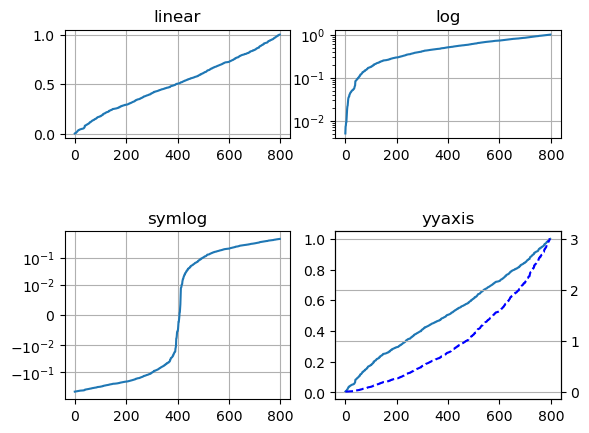

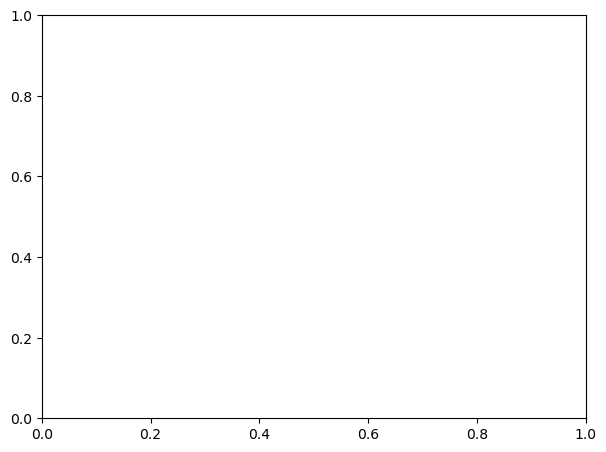

In [37]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval
y = np.random.normal(loc=0.5, scale=0.4, size=1000) #normal distribution with a mean of 0.5 and a standard dev. of 0.4
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
mp.figure('hot')
# can graph in subplots. Below, 221 specifies a two by two grid, the 1 being the first spot in the grid.
# linear
mp.subplot(321)
mp.plot(x, y)
mp.yscale('linear')
mp.title('linear')
mp.grid(True)

# log
mp.subplot(322)
mp.plot(x, y)
mp.yscale('log')
mp.title('log')
mp.grid(True)

# symmetric log
mp.subplot(223)
mp.plot(x, y - y.mean())
mp.yscale('symlog', linthresh=0.01)
mp.title('symlog')
mp.grid(True)

# yyaxis
mp.subplot(224)
ax = mp.gca() #grabs current axis
ax2 = ax.twinx() # makes a twin axis in some plot
# using ax.plot allows you to plot using a specific axis
ax.plot(x, y)
ax2.plot(x,3*y**2,'b--')

mp.title('yyaxis')
mp.grid(True)

mp.figure()

## strictly for formatting purposes_____
from matplotlib.ticker import NullFormatter 
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
mp.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
mp.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,wspace=0.35)
#______
mp.show()

## 3-Dimensional Plotting
Originally `matplotlib` was built only with 2-D plotting capabilities, but 3-D capabilities have been added. The following example was taken from [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html). Please visit that sight for further details.

In [38]:
# Preamble for setting up 3D graphing
#from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')

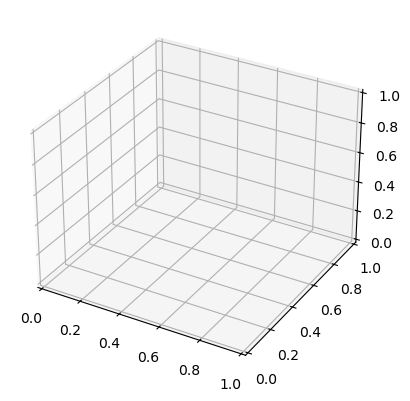

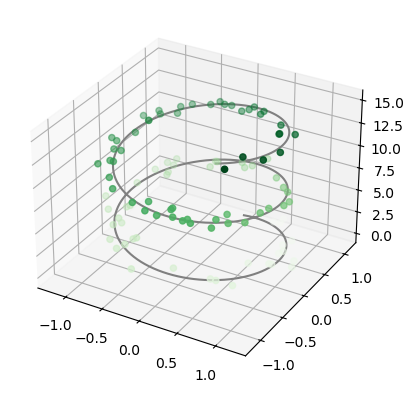

In [40]:
# Preamble for setting up 3D graphing
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
plt.show()

# Animations in Python
`matplotlib` contains functions used to animate plots. These functions are in the submodule (subpackage) `matplotlib.animation`. To see what functions are available, you can import this module and use the `dir` method

In [41]:
import matplotlib.animation as ma
dir(ma)

['AbstractMovieWriter',
 'Animation',
 'ArtistAnimation',
 'BytesIO',
 'DISPLAY_TEMPLATE',
 'FFMpegBase',
 'FFMpegFileWriter',
 'FFMpegWriter',
 'FileMovieWriter',
 'FuncAnimation',
 'HTMLWriter',
 'INCLUDED_FRAMES',
 'Image',
 'ImageMagickBase',
 'ImageMagickFileWriter',
 'ImageMagickWriter',
 'JS_INCLUDE',
 'MovieWriter',
 'MovieWriterRegistry',
 'Path',
 'PillowWriter',
 'STYLE_INCLUDE',
 'TemporaryDirectory',
 'TextIOWrapper',
 'TimedAnimation',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_embedded_frames',
 '_included_frames',
 '_log',
 '_validate_grabframe_kwargs',
 'abc',
 'adjusted_figsize',
 'base64',
 'cbook',
 'contextlib',
 'itertools',
 'logging',
 'mcolors',
 'mpl',
 'np',
 'shutil',
 'subprocess',
 'subprocess_creation_flags',
 'sys',
 'uuid',
 'warnings',
 'writers']

we'll look at `FuncAnimation` in detail after we have talked about python functions.

# Exercise: Sunspot Analysis

Create three different visualizations to explore solar activity over the past 300+ years.

## Load the data:
```python
import numpy as np
import matplotlib.pyplot as mp

sunspots = np.genfromtxt("data/sunspotsbyyear.csv", delimiter=',', filling_values=np.nan)
years = sunspots[:, 0]
num_spots = sunspots[:, 1]
stdev = sunspots[:, 2]
```

## Task 1: Line Plot of Solar Activity
Create a line plot showing how sunspot counts have varied over time.
- Plot `num_spots` vs. `years`
- Use a thin line (linewidth=0.8)
- Title: "Annual Sunspot Count (1700-2023)"
- Axis labels: "Year" and "Number of Sunspots"
- Enable grid

You should see a repeating pattern in the data.

## Task 2: Scatter Plot with Error Bars
Show the same data with measurement uncertainty included.
- Use: `mp.errorbar(...)`
- Title: "Sunspot Counts with Measurement Uncertainty"
- Same axis labels as Task 1
- Enable grid

The `yerr=stdev` parameter adds vertical error bars showing the standard deviation.

## Task 3: Histogram of Sunspot Distribution
Examine how sunspot counts are distributed.
- Create a histogram of `num_spots`
- Use 25 bins
- Title: "Distribution of Annual Sunspot Counts"
- Axis labels: "Number of Sunspots" and "Frequency"

## Reflection Questions:
1. From the line plot, estimate how many years pass between peaks in sunspot activity.
2. Does the error bar plot show larger uncertainty during high or low sunspot activity?
3. Looking at the histogram, is low sunspot activity or high sunspot activity more common?

**Tip:** Create each plot separately using `mp.figure()` before each one.